In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-20 12:44:47.799305: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-20 12:44:47.838121: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-20 12:44:48.420029: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')
df_Ostra_Mexilhao = pd.DataFrame(df[['Ano','Ostra_art','Mexilhao_art']])


dados = df_Ostra_Mexilhao.dropna().reset_index(drop=True)

#Fazendo as proporções de ostra_art em relação a mexilhao_art
for i in range(len(dados['Ano'])):
  if dados.loc[i,'Mexilhao_art'] !=0:
    dados.loc[i,'Prop_Ostra_art'] = dados.loc[i,'Ostra_art'] / dados.loc[i,'Mexilhao_art']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1968])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()


prop = dados['Prop_Ostra_art'].values
dados.head()

,Ano,Ostra_art,Mexilhao_art,Prop_Ostra_art
0,1962,3.0,2.0,1.500000
1,1963,5.0,70.0,0.071429
2,1964,17.0,600.0,0.028333
3,1966,13.0,32.0,0.406250
4,1984,19.0,23.0,0.826087


In [5]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [12]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=300, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Ostra/pesos prop Ostra Mexilhao/.weights.h5', overwrite=True)

Epoch 1/300


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9712
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.9365
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.8973
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.8535
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.8080
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.7618
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7201
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6877
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6719
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6697
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6619
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.6382
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6039
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5680
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5360
Epoch 16/300
1/1 ━━━━━━━━━━━━━━━━

In [7]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Ostra/pesos prop Ostra Mexilhao/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Previsões dos dados ausentes: [[0.36450905]]


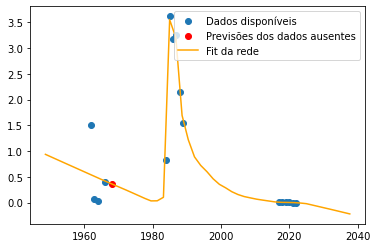

In [13]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

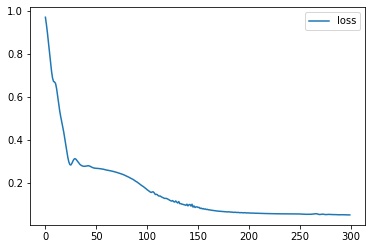

In [14]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [18]:
#Planilha com dados preenchidos
df_preenchido = df[['Ano','Ostra_art','Mexilhao_art']].iloc[1968-1950,:].reset_index(drop=True)

df_preenchido.loc['Ostra_art'] = 135*(1/(1+1/prev_ausentes[0,0]))
df_preenchido.loc['Mexilhao_art'] = 135 - df_preenchido.loc['Ostra_art']

df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Ostra/Previsão Ostra Mexilhao_1968.xlsx')

df_preenchido

0               1968.000000
1                       NaN
2                       NaN
Ostra_art         36.063316
Mexilhao_art      98.936684
Name: 18, dtype: float64